In [125]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [126]:
train_data = pd.read_csv("train.csv")

In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [128]:
train_data.shape

(100000, 12)

In [129]:
train_data[train_data['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
215,215,0,1,"Partida, William",male,0.83,1,0,27228,10.53,NaN,S
228,228,1,3,"Kabel, Rosa",female,0.50,1,2,201054,33.92,NaN,S
415,415,1,2,"Blakey, Sandra",female,0.75,1,2,439368,34.37,NaN,S
444,444,1,1,"Winterbottom, Velma",female,0.50,1,1,347054,32.83,C4421,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99307,99307,1,2,"Keyser, William",male,0.25,0,1,21907,71.57,NaN,S
99527,99527,0,3,"Lawrence, Barry",male,0.92,1,1,439308,8.45,NaN,S
99601,99601,0,3,"Smith, Roxanne",female,0.17,1,2,435887,67.06,NaN,C
99839,99839,1,3,"Lewis, Jeffrey",male,0.83,1,1,14319,13.95,NaN,C


# Context

The dataset contains information about passengers of Titanic. 

Labels to note:

Survived - survival (0 = No; 1 = Yes)

Pclass - passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - name

Sex - sex

Age - age

SibSp - number of siblings/spouses aboard

Parch - number of parents/children aboard

Ticket - ticket number

Fare - passenger fare

Cabin - cabin

Embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Data quality assessment

In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [183]:
# удаляем неполные данные по билетам
test = train_data.copy()
test = test.dropna(axis=0, how='any', subset=['Ticket'])
pd.isna(test).sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3136
SibSp              0
Parch              0
Ticket             0
Fare             128
Cabin          63326
Embarked         241
dtype: int64

In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95377 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  95377 non-null  int64  
 1   Survived     95377 non-null  int64  
 2   Pclass       95377 non-null  int64  
 3   Name         95377 non-null  object 
 4   Sex          95377 non-null  object 
 5   Age          92241 non-null  float64
 6   SibSp        95377 non-null  int64  
 7   Parch        95377 non-null  int64  
 8   Ticket       95377 non-null  object 
 9   Fare         95249 non-null  float64
 10  Cabin        32051 non-null  object 
 11  Embarked     95136 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ MB


In [185]:
# удаляем дубликаты, если они есть
test = test.drop_duplicates(subset=['Name','Ticket'], keep='first', inplace=False, ignore_index=False)

Проверим содержимое столбцов

In [186]:
set(test['Survived'].values)

{0, 1}

In [187]:
set(test['Pclass'].values)

{1, 2, 3}

In [188]:
set(test['Sex'].values)

{'female', 'male'}

In [138]:
#print(sorted(set(test['Age'].values)))

In [139]:
#set(test['SibSp'].values)

In [140]:
#print(set(test['Cabin'].values))

In [189]:
print(set(test['Embarked'].values))

{nan, 'C', 'Q', 'S'}


In [190]:
test.groupby(by='Name')['Ticket'].count().sort_values(ascending=False)

Name
Johnson, John       30
Smith, John         24
Smith, James        23
Johnson, William    20
Jones, James        19
                    ..
Gould, Keith         1
Gould, Jennifer      1
Gould, Cindy         1
Gould, Brandon       1
Zywiec, Rebecca      1
Name: Ticket, Length: 88072, dtype: int64

In [192]:
test.groupby(by='Ticket')['Name'].count().sort_values(ascending=False)

Ticket
A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
              ... 
402718           1
4027198          1
4027354          1
4027412          1
WE/P 9779        1
Name: Name, Length: 75331, dtype: int64

In [193]:
test[test['Ticket'] == "28380"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9021,9021,0,1,"Thompson, Jay",male,20.0,0,0,28380,198.92,A16263,S
14845,14845,0,3,"Alicea, William",male,32.0,0,0,28380,26.23,E4266,S
44543,44543,0,1,"Hunter, Joel",male,25.0,0,0,28380,58.38,C17566,Q
50019,50019,1,3,"Morgan, Alice",female,33.0,0,1,28380,56.25,D4793,C
67177,67177,0,1,"Ross, Glenda",female,57.0,0,1,28380,32.90,D11036,C
98810,98810,0,3,"Stone, Patrick",male,38.0,0,0,28380,29.59,NaN,S


По одному билету скорее всего не могло быть столько пассажиров, поэтому удалим дубликаты по билету

In [194]:
test = test.drop_duplicates(subset=['Ticket'], keep='first', inplace=False, ignore_index=False)

In [195]:
test.shape

(75331, 12)

In [200]:
# удаляем неполные данные по возрасту
test = test.dropna(axis=0, how='any', subset=['Age'])

In [201]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S


In [202]:
# преобразование данных в графе "Возраст"
test['Age'] = test['Age'].map(lambda x: int(x))

In [203]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,0,3,"Owens, Kenneth",male,0,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7,0,0,A/5,9.77,NaN,S


Вопрос: как отделить команду от пассажиров? остается открытым

# Data exploration

In [204]:
# распрелеление выживших
test.groupby(by='Survived')['PassengerId'].count()

Survived
0    42186
1    30667
Name: PassengerId, dtype: int64

Text(0.5, 0, 'Lost / Survived')

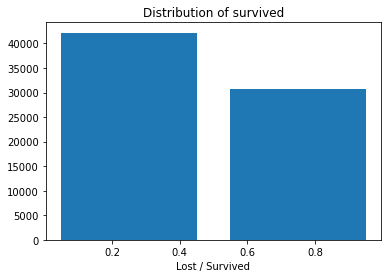

In [205]:
plt.title("Distribution of survived")

plt.hist(test.Survived, bins=2, rwidth=0.8,  label='Survived')
plt.xlabel('Lost / Survived')


In [206]:
# выжившие по классам
test.groupby(by=['Survived','Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          9919
          2         10129
          3         22138
1         1         13695
          2         10820
          3          6152
Name: PassengerId, dtype: int64

In [213]:
# выжившие по полу, процентное соотношение
test.groupby(by=['Survived','Sex'])['PassengerId'].count()/test.groupby(by=['Survived'])['PassengerId'].count() * 100


Survived  Sex   
0         female    21.549803
          male      78.450197
1         female    73.476375
          male      26.523625
Name: PassengerId, dtype: float64

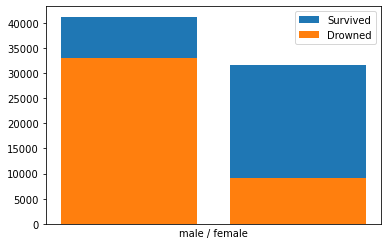

In [221]:
plt.hist(test.Sex, bins=2, rwidth=0.8, stacked=True, label='Survived')
plt.hist(test[test.Survived ==0].Sex, bins=2,rwidth = 0.8, label='Drowned')
plt.xlabel('male / female')
plt.legend()

In [218]:
# выжившие по классам
test.groupby(by=['Survived','Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          9919
          2         10129
          3         22138
1         1         13695
          2         10820
          3          6152
Name: PassengerId, dtype: int64

In [219]:
# выжившие по классам: процентное соотношение
test.groupby(by=['Survived','Pclass'])['PassengerId'].count()/test.groupby(by=['Survived'])['PassengerId'].count()*100

Survived  Pclass
0         1         23.512540
          2         24.010335
          3         52.477125
1         1         44.657123
          2         35.282225
          3         20.060652
Name: PassengerId, dtype: float64

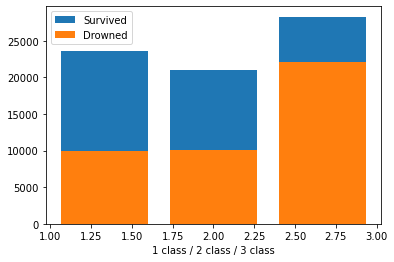

In [223]:
plt.hist(test.Pclass, bins=3, rwidth=0.8, stacked=True, label='Survived')
plt.hist(test[test.Survived == 0].Pclass, bins=3, rwidth=0.8, label='Drowned')
plt.xlabel('1 class / 2 class / 3 class')
plt.legend()

In [208]:
# выжившие по классам и по полу
test.groupby(by=['Survived','Pclass','Sex'])['PassengerId'].count()

Survived  Pclass  Sex   
0         1       female     2943
                  male       6976
          2       female     2601
                  male       7528
          3       female     3547
                  male      18591
1         1       female     9659
                  male       4036
          2       female     8552
                  male       2268
          3       female     4322
                  male       1830
Name: PassengerId, dtype: int64

In [216]:
# распределение выживших по полу по классам по отношению ко всем выжившим в классе в процентах
test.groupby(by=['Survived','Pclass','Sex'])['PassengerId']\
 .count()/test.groupby(by=['Survived','Pclass'])['PassengerId'].count()*100

Survived  Pclass  Sex   
0         1       female    29.670330
                  male      70.329670
          2       female    25.678744
                  male      74.321256
          3       female    16.022224
                  male      83.977776
1         1       female    70.529390
                  male      29.470610
          2       female    79.038817
                  male      20.961183
          3       female    70.253576
                  male      29.746424
Name: PassengerId, dtype: float64

Вывод: Больше всего погибло мужчин 3-го класса, выжило женщин 2-го класса

Распределение выживших с детьми и без

In [224]:
#кол-во выживших с детьми
len(test[(test['Survived']  == 1 ) & (test['Parch']  > 0) ])

9605

In [229]:
#кол-во выживших без детей|родителей
len(test[(test['Survived']  == 1 ) & (test['Parch']  == 0) ])

21062

Text(0, 0.5, 'Survived')

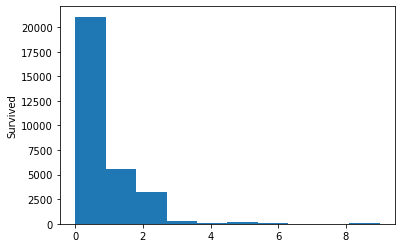

In [228]:
plt.hist(test[test.Survived == 1]['Parch'])
plt.ylabel("Survived")

In [230]:
#кол-во выживших без родственников
len(test[(test['Survived']  == 1 ) & (test['SibSp']  == 0)])

22291

In [231]:
#кол-во выживших без родственников
len(test[(test['Survived']  == 1 ) & (test['SibSp'] > 0)])

8376

# Summary

In [ ]:
Вероятность выжить больше у одиноких женщин первого класса